In [ ]:
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading Data:
import pandas as pd

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    dfX = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')    
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bogor.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/tangerang.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bekasi.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    dfX = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfB.shape, dfT.shape, dfX.shape

--2022-09-23 07:10:42--  https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63832 (62K) [text/plain]
Saving to: ‘data/jakarta.csv’

jakarta.csv         100%[===================>]  62.34K  --.-KB/s    in 0.02s   

2022-09-23 07:10:42 (4.02 MB/s) - ‘data/jakarta.csv’ saved [63832/63832]

--2022-09-23 07:10:42--  https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43191

((1024, 26), (998, 26), (999, 26), (128, 26), (992, 26))

In [ ]:
url = 'https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bogor.csv'
dfB = pd.read_csv(url, index_col=0)

In [ ]:
dfB.transpose()

created_at,03-12-2021,06-12-2021,06-12-2021,06-12-2021,06-12-2021,06-12-2021,06-12-2021,06-12-2021,06-12-2021,06-12-2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LT,75.0,60.0,60.0,60.0,90.0,120.0,125.0,97.0,72.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LB,38.0,40.0,50.0,70.0,60.0,70.0,125.0,72.0,33.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KT,2.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KM,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
garasi,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carport,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lokasi,Bojonggede,Babakan Madang,Babakan Madang,Babakan Madang,Babakan Madang,Babakan Madang,Babakan Madang,Cibinong,Gunung Putri,Gunung Putri,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sertifikat,SHM,SHM,SHM,SHM,SHM,SHM,SHM,SHM,SHM,SHM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listrik,1300.0,2200.0,2200.0,2200.0,2200.0,2200.0,2200.0,2200.0,1300.0,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hadap,Barat,NaN,NaN,NaN,NaN,NaN,NaN,Selatan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfB.drop(['Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'],axis=1, inplace=True)

In [ ]:
dfB

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
created_at,,,,,,,,,,,,,
03-12-2021,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,Barat,6.925500e+08,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka..."
06-12-2021,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,8.114000e+08,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
06-12-2021,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,9.005000e+08,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
06-12-2021,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,1.001900e+09,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
06-12-2021,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,NaN,1.200800e+09,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfB.isnull().sum()

LT            806
LB            806
KT            806
KM            806
garasi        806
carport       806
lokasi        806
sertifikat    806
listrik       806
hadap         980
harga         806
URL           806
deskripsi     806
dtype: int64

In [ ]:
dfB.duplicated().sum()

805

In [ ]:
dfB.drop_duplicates(inplace=True)

In [ ]:
dfB.isnull().sum()

LT              1
LB              1
KT              1
KM              1
garasi          1
carport         1
lokasi          1
sertifikat      1
listrik         1
hadap         175
harga           1
URL             1
deskripsi       1
dtype: int64

In [ ]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 03-12-2021 to nan
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LT          193 non-null    float64
 1   LB          193 non-null    float64
 2   KT          193 non-null    float64
 3   KM          193 non-null    float64
 4   garasi      193 non-null    float64
 5   carport     193 non-null    float64
 6   lokasi      193 non-null    object 
 7   sertifikat  193 non-null    object 
 8   listrik     193 non-null    float64
 9   hadap       19 non-null     object 
 10  harga       193 non-null    float64
 11  URL         193 non-null    object 
 12  deskripsi   193 non-null    object 
dtypes: float64(8), object(5)
memory usage: 21.2+ KB


In [ ]:
dfB['lokasi']=dfB['lokasi'].astype('category')
dfB['sertfikat']=dfB['sertifikat'].astype('category')
dfB['hadap']=dfB['hadap'].astype('category')

In [ ]:
dfB

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,sertfikat
created_at,,,,,,,,,,,,,,
03-12-2021,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,Barat,6.925500e+08,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka...",SHM
06-12-2021,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,8.114000e+08,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,SHM
06-12-2021,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,9.005000e+08,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,SHM
06-12-2021,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,1.001900e+09,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,SHM
06-12-2021,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,NaN,1.200800e+09,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,SHM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
03-12-2021,107.0,31.0,2.0,1.0,0.0,1.0,Sukaraja,SHM,1300.0,NaN,4.086500e+08,https://www.rumah.com/listing-properti/dijual-...,Rumah siap huni,SHM
03-12-2021,210.0,150.0,4.0,2.0,1.0,1.0,Bogor Selatan,SHM,2200.0,NaN,1.200000e+09,https://www.rumah.com/listing-properti/dijual-...,Cuma 10 menit ke kota,SHM
03-12-2021,90.0,36.0,2.0,1.0,0.0,1.0,Cileungsi,SHM,1300.0,NaN,4.405500e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat rumah sakit, dekat pasar",SHM


In [ ]:
dfB.dropna(subset=['LT'],inplace=True)

In [ ]:
dfB

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,sertfikat
created_at,,,,,,,,,,,,,,
03-12-2021,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,Barat,6.925500e+08,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka...",SHM
06-12-2021,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,8.114000e+08,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,SHM
06-12-2021,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,9.005000e+08,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,SHM
06-12-2021,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,1.001900e+09,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,SHM
06-12-2021,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,NaN,1.200800e+09,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,SHM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
03-12-2021,90.0,36.0,2.0,1.0,0.0,1.0,Gunung Putri,SHM,1300.0,NaN,4.405500e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat taman buah mekarsari, dekat rumah sakit",SHM
03-12-2021,107.0,31.0,2.0,1.0,0.0,1.0,Sukaraja,SHM,1300.0,NaN,4.086500e+08,https://www.rumah.com/listing-properti/dijual-...,Rumah siap huni,SHM
03-12-2021,210.0,150.0,4.0,2.0,1.0,1.0,Bogor Selatan,SHM,2200.0,NaN,1.200000e+09,https://www.rumah.com/listing-properti/dijual-...,Cuma 10 menit ke kota,SHM


In [ ]:
dfB.isnull().sum()

LT              0
LB              0
KT              0
KM              0
garasi          0
carport         0
lokasi          0
sertifikat      0
listrik         0
hadap         174
harga           0
URL             0
deskripsi       0
sertfikat       0
dtype: int64

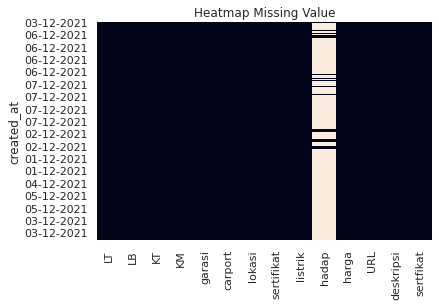

In [ ]:
sns.heatmap(dfB.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
dfB.describe()

,LT,LB,KT,KM,garasi,carport,listrik,harga
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,1.930000e+02
mean,143.575130,98.663212,2.694301,1.797927,0.155440,1.310881,2076.165803,1.289362e+09
std,191.576208,125.851746,1.110939,1.175087,0.485931,0.905271,1562.633932,2.115854e+09
min,30.000000,21.000000,1.000000,1.000000,0.000000,0.000000,900.000000,6.500000e+07
25%,66.000000,36.000000,2.000000,1.000000,0.000000,1.000000,1300.000000,3.990000e+08
50%,84.000000,58.000000,2.000000,1.000000,0.000000,1.000000,1300.000000,6.700000e+08
75%,120.000000,90.000000,3.000000,2.000000,0.000000,1.000000,2200.000000,1.250000e+09
max,1500.000000,1200.000000,8.000000,6.000000,3.000000,8.000000,17600.000000,1.650000e+10


In [ ]:
dfB.sort_values('harga')

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,sertfikat
created_at,,,,,,,,,,,,,,
04-12-2021,84.0,36.0,2.0,1.0,0.0,1.0,Dramaga,SHM,1300.0,NaN,6.500000e+07,https://www.rumah.com/listing-properti/dijual-...,"Rumah hooked, take over murah",SHM
04-12-2021,119.0,36.0,2.0,1.0,0.0,1.0,Sukaraja,SHM,1300.0,NaN,6.500000e+07,https://www.rumah.com/listing-properti/dijual-...,Take over rumah permata cilebut,SHM
01-12-2021,93.0,36.0,2.0,1.0,0.0,1.0,Bogor Barat,SHGB,1300.0,NaN,6.500000e+07,https://www.rumah.com/listing-properti/dijual-...,"Lokasi super strategis, akses jalan tembus ke ...",SHGB
01-12-2021,60.0,36.0,2.0,1.0,0.0,1.0,Bojonggede,SHM,1300.0,NaN,7.000000e+07,https://www.rumah.com/listing-properti/dijual-...,-15 Mnt dari stasiun cilebut dan bojong gede -...,SHM
07-12-2021,30.0,25.0,1.0,1.0,0.0,1.0,Cibinong,SHM,1300.0,NaN,1.300000e+08,https://www.rumah.com/listing-properti/dijual-...,"Lokasi strategis, keamanan 24 jam, arena berma...",SHM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
02-12-2021,696.0,400.0,3.0,3.0,1.0,1.0,Babakan Madang,SHM,5500.0,NaN,8.500000e+09,https://www.rumah123.com/properti/bogor/hos927...,"Ada kolam renang, taman, dan keamanan",SHM
03-12-2021,1058.0,283.0,6.0,6.0,3.0,5.0,Bogor Tengah,SHM,1300.0,NaN,8.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah di pinggir jalan,SHM
06-12-2021,1500.0,1200.0,8.0,6.0,0.0,8.0,Cileungsi,SHM,17600.0,NaN,9.900000e+09,https://www.rumah.com/listing-properti/dijual-...,"Akses mobil besar 40 ft bisa masuk, parkir mob...",SHM
